In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd



In [2]:
df = pd.read_excel("../db/sentence_sample_mh.xlsx",header=1)
df.to_csv("data.csv", sep="|")
dataset1 = pd.read_csv('data.csv', header=None, sep='|')
dataset1

,0,1,2,3,4,5,6,7
0,NaN,4065,4.0,Patrik's proven command of this business and t...,UAA,"Under Armour, Inc. (NYSE:UAA) Q3 2019 Results ...",Kevin Plank,presentation
1,0.0,2730,3.0,"We will be at the Jefferies conference, hardwa...",NVDA,NVIDIA Corporation (NASDAQ:NVDA) Q2 2020 Earni...,Colette Kress,presentation
2,1.0,4044,3.0,[Operator Instructions].,UAA,"Under Armour, Inc. (NYSE:UAA) Q3 2019 Results ...",Operator,operator_instruction
3,2.0,1833,3.0,Any update that you can share in terms of mile...,GM,General Motors Company (NYSE:GM) Q3 2019 Earni...,Itay Michaeli,question
4,3.0,2721,3.0,"With that, let me turn to the outlook for the ...",NVDA,NVIDIA Corporation (NASDAQ:NVDA) Q2 2020 Earni...,Colette Kress,presentation
5,4.0,3984,3.0,Hope that helps.,TWTR,"Twitter, Inc. (NYSE:TWTR) Q3 2019 Results Earn...",Ned Segal,answer
6,5.0,3929,1.0,Since you're probably wondering and we've talk...,TWTR,"Twitter, Inc. (NYSE:TWTR) Q3 2019 Results Earn...",Ned Segal,answer
7,6.0,1004,3.0,Good morning and welcome to GE's third quarter...,GE,General Electric Company (NYSE:GE) Q3 2019 Ear...,Steve Winoker,presentation
8,7.0,2010,2.0,There's no other like one time item or whateve...,GM,General Motors Company (NYSE:GM) Q3 2019 Earni...,Dhivya Suryadevara,answer
9,8.0,1042,4.0,"We started putting that cash to work, with a $...",GE,General Electric Company (NYSE:GE) Q3 2019 Ear...,Larry Culp,presentation


In [3]:
doca = dataset1[3]
doca

0       Patrik's proven command of this business and t...
1       We will be at the Jefferies conference, hardwa...
2                                [Operator Instructions].
3       Any update that you can share in terms of mile...
4       With that, let me turn to the outlook for the ...
5                                        Hope that helps.
6       Since you're probably wondering and we've talk...
7       Good morning and welcome to GE's third quarter...
8       There's no other like one time item or whateve...
9       We started putting that cash to work, with a $...
10      I’m pleased to announce that carne asada is th...
11      We have 30.2 million digital active customers ...
12      So, I think what you see a little bit relative...
13      I think it is very hard to provide guidance on...
14                    And I believe that we started that.
15       And then on carne asada, if you could help qu...
16      So the focus that we've put on the customer ex...
17      Mortga

In [4]:
lstop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than','okay']

In [5]:
tfidf = TfidfVectorizer(stop_words=lstop_words)

In [6]:
response = tfidf.fit_transform(doca)

In [7]:
tfidf.vocabulary_

{'patrik': 2945,
 'proven': 3206,
 'command': 872,
 'business': 674,
 'confidence': 951,
 'armour': 420,
 'prospects': 3198,
 'shift': 3714,
 'defense': 1181,
 'offense': 2782,
 'jefferies': 2275,
 'conference': 950,
 'hardware': 1971,
 'communications': 892,
 'infrastructure': 2171,
 'summit': 3975,
 'august': 473,
 '27': 76,
 'citi': 815,
 'global': 1878,
 'technology': 4052,
 'september': 3678,
 '25': 69,
 'operator': 2824,
 'instructions': 2203,
 'update': 4308,
 'share': 3701,
 'terms': 4071,
 'miles': 2610,
 'driven': 1361,
 'overall': 2888,
 'activity': 234,
 'cruise': 1092,
 'undergoing': 4262,
 'second': 3643,
 'half': 1951,
 'let': 2394,
 'turn': 4220,
 'outlook': 2878,
 'third': 4092,
 'quarter': 3251,
 'fiscal': 1706,
 '2020': 54,
 'hope': 2046,
 'helps': 2012,
 'since': 3762,
 're': 3296,
 'probably': 3142,
 'wondering': 4468,
 've': 4350,
 'talked': 4029,
 'bit': 589,
 'cpms': 1068,
 'last': 2355,
 'period': 2982,
 'time': 4114,
 'product': 3155,
 'related': 3399,
 'issue

In [8]:
print(response[0])

  (0, 2945)	0.2874155081291462
  (0, 3206)	0.37524780478244346
  (0, 872)	0.37524780478244346
  (0, 674)	0.1828437702590124
  (0, 951)	0.2843013857436154
  (0, 420)	0.2736315358070561
  (0, 3198)	0.34396130945433506
  (0, 3714)	0.2874155081291462
  (0, 1181)	0.35694637823651243
  (0, 2782)	0.34396130945433506


In [9]:
response_array = response.toarray()

In [10]:
response_array.shape

(3000, 4519)

In [77]:
kmeans = KMeans(n_clusters=500).fit(response)

In [11]:
kmeans = KMeans(n_clusters=8).fit(response_array)

In [12]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.inertia_

2733.571458353177

In [14]:
lines_for_predicting = ["Mike is awesome!", "some androids is there in the brain"]
kmeans.predict(tfidf.transform(lines_for_predicting))


array([0, 0])

In [15]:
kmeans.inertia_

2733.571458353177

In [16]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(response)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

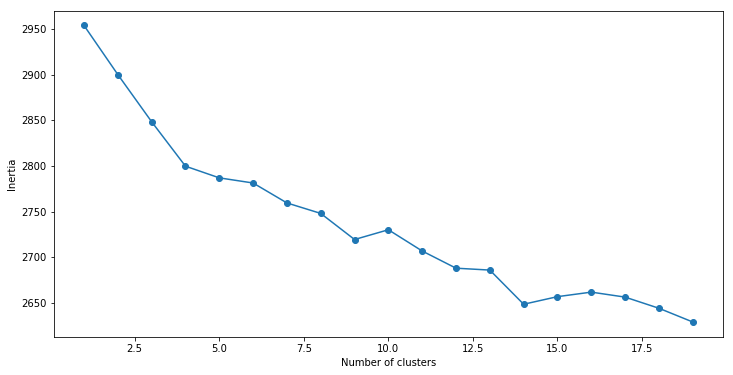

In [17]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [66]:
kmeans = KMeans(n_jobs = -1, n_clusters = 9, init='k-means++')
kmeans.fit(response)
pred = kmeans.predict(response)

In [67]:
pred
#https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

array([0, 0, 0, ..., 0, 0, 6])

In [68]:
frame = pd.DataFrame(response)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1822
2     544
4     180
8     122
7      95
5      87
6      69
1      47
3      34
Name: cluster, dtype: int64

In [69]:
frame.head()

,0,cluster
0,"(0, 2945)\t0.2874155081291462\n (0, 3206)\t0.37524780478244346\n (0, 872)\t0.37524780478244346\n (0, 674)\t0.18...",0
1,"(0, 2275)\t0.28306688712381356\n (0, 950)\t0.400862468826321\n (0, 1971)\t0.28306688712381356\n (0, 892)\t0.308...",0
2,"(0, 2824)\t0.6822373995473022\n (0, 2203)\t0.731130720636833",0
3,"(0, 4308)\t0.29788868443226524\n (0, 3701)\t0.2683699007258512\n (0, 4071)\t0.23475108021507582\n (0, 2610)\t0....",0
4,"(0, 2394)\t0.41422165504694397\n (0, 4220)\t0.4205662394251229\n (0, 2878)\t0.42510572325625434\n (0, 4092)\t0....",2


In [70]:
response

<3000x4519 sparse matrix of type '<class 'numpy.float64'>'
	with 28323 stored elements in Compressed Sparse Row format>

In [71]:
dataset1['cluster'] = pred
dataset1['cluster'].value_counts()

0    1822
2     544
4     180
8     122
7      95
5      87
6      69
1      47
3      34
Name: cluster, dtype: int64

In [72]:
dataset1.head(10)


,0,1,2,3,4,5,6,7,cluster
0,NaN,4065,4.0,Patrik's proven command of this business and the confidence we have about Under Armour's prospects as we shift from ...,UAA,"Under Armour, Inc. (NYSE:UAA) Q3 2019 Results Earnings Conference Call November 4, 2019 8:30 AM ET",Kevin Plank,presentation,0
1,0.0,2730,3.0,"We will be at the Jefferies conference, hardware and communications infrastructure summit, on August 27 and at the C...",NVDA,"NVIDIA Corporation (NASDAQ:NVDA) Q2 2020 Earnings Conference Call August 15, 2019 5:30 PM ET",Colette Kress,presentation,0
2,1.0,4044,3.0,[Operator Instructions].,UAA,"Under Armour, Inc. (NYSE:UAA) Q3 2019 Results Earnings Conference Call November 4, 2019 8:30 AM ET",Operator,operator_instruction,0
3,2.0,1833,3.0,Any update that you can share in terms of miles driven and the overall activity that Cruise is undergoing in the sec...,GM,"General Motors Company (NYSE:GM) Q3 2019 Earnings Conference Call October 29, 2019 10:00 AM ET",Itay Michaeli,question,0
4,3.0,2721,3.0,"With that, let me turn to the outlook for the third quarter of fiscal 2020.",NVDA,"NVIDIA Corporation (NASDAQ:NVDA) Q2 2020 Earnings Conference Call August 15, 2019 5:30 PM ET",Colette Kress,presentation,2
5,4.0,3984,3.0,Hope that helps.,TWTR,"Twitter, Inc. (NYSE:TWTR) Q3 2019 Results Earnings Conference Call October 24, 2019 8:00 AM ET",Ned Segal,answer,0
6,5.0,3929,1.0,Since you're probably wondering and we've talked about it a bit CPMs have been up for the last period of time here b...,TWTR,"Twitter, Inc. (NYSE:TWTR) Q3 2019 Results Earnings Conference Call October 24, 2019 8:00 AM ET",Ned Segal,answer,4
7,6.0,1004,3.0,Good morning and welcome to GE's third quarter 2019 earnings call.,GE,"General Electric Company (NYSE:GE) Q3 2019 Earnings Conference Call October 30, 2019 8:00 AM ET",Steve Winoker,presentation,6
8,7.0,2010,2.0,There's no other like one time item or whatever else that's out there but the profit impact that you talked about us...,GM,"General Motors Company (NYSE:GM) Q3 2019 Earnings Conference Call October 29, 2019 10:00 AM ET",Dhivya Suryadevara,answer,0
9,8.0,1042,4.0,"We started putting that cash to work, with a $5 billion Industrial debt tender and we recently announced important b...",GE,"General Electric Company (NYSE:GE) Q3 2019 Earnings Conference Call October 30, 2019 8:00 AM ET",Larry Culp,presentation,0


In [73]:
dataset1.cluster.mean()

1.4823333333333333

In [74]:
dataset1[7].value_counts()

answer                  1321
presentation             889
question                 591
operator_instruction     199
Name: 7, dtype: int64

In [75]:
dataset1.groupby(7).count()[['cluster']]

,cluster
7,
answer,1321
operator_instruction,199
presentation,889
question,591


In [76]:
dataset1.groupby('cluster').count()[[7]]

,7
cluster,
0,1822
1,47
2,544
3,34
4,180
5,87
6,69
7,95
8,122


In [77]:
cool = dataset1.groupby([7,'cluster'])['cluster'].count()
cool

7                     cluster
answer                0          785
                      1           41
                      2          299
                      3            8
                      4          125
                      5           16
                      6           25
                      7           10
                      8           12
operator_instruction  0           70
                      2            6
                      6            2
                      7           31
                      8           90
presentation          0          656
                      1            1
                      2          165
                      3            4
                      4           23
                      5           14
                      6           10
                      7            8
                      8            8
question              0          311
                      1            5
                      2           74
        

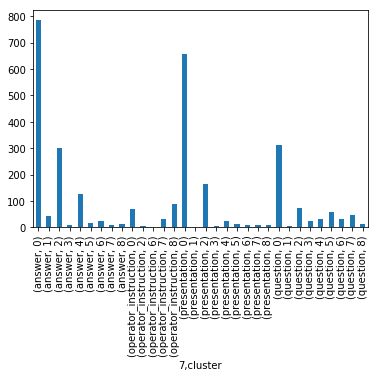

In [78]:
cool.plot.bar()

In [79]:
coolticker = dataset1.groupby([4,'cluster'])['cluster'].count()
coolticker

4     cluster
CMG   0          154
      1           13
      2           67
      3            6
      4           25
      5            8
      6            2
      7           17
      8           14
CRM   0          174
      1            7
      2           52
      3            4
      4           15
      5           12
      6            2
      7           11
      8           13
GE    0          229
      1            3
      2           72
      3            1
      4           12
      5            5
      6           13
      7            4
      8            2
GM    0          201
      1            2
      2           49
                ... 
SBUX  4           24
      5            5
      6            3
      7            7
      8           14
TWTR  0          136
      2           26
      3            6
      4           13
      5           16
      6            1
      7           12
      8           17
UAA   0          220
      2           63
      3            7

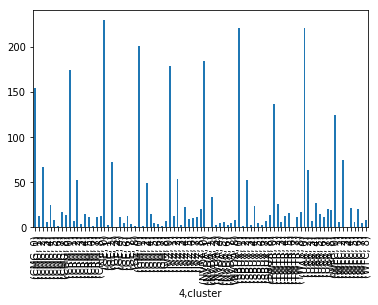

In [80]:
coolticker.plot.bar()

In [81]:
result = dataset1.sort_values('cluster', ascending=[1])

In [82]:
result

,0,1,2,3,4,5,6,7,cluster
0,NaN,4065,4.0,Patrik's proven command of this business and the confidence we have about Under Armour's prospects as we shift from ...,UAA,"Under Armour, Inc. (NYSE:UAA) Q3 2019 Results Earnings Conference Call November 4, 2019 8:30 AM ET",Kevin Plank,presentation,0
1783,1782.0,4076,4.0,"All of this, of course, centers around three critical aspects of the brand – making great product that is authentica...",UAA,"Under Armour, Inc. (NYSE:UAA) Q3 2019 Results Earnings Conference Call November 4, 2019 8:30 AM ET",Kevin Plank,presentation,0
1782,1781.0,3390,3.0,"Sara, what I'd like to do first is maybe just step -- take a step back and talk about Q4 in total.",SBUX,"Starbucks Corporation (NASDAQ:SBUX) Q4 2019 Earnings Conference Call October 30, 2019 4:30 PM ET",Pat Grismer,answer,0
1779,1778.0,902,3.0,And just go back to the UniCredit situation that I mentioned in the earnings call.,CRM,"Salesforce.com, inc. (NYSE:CRM) Q2 2020 Results Earnings Conference Call August 22, 2019 5:00 PM ET",Keith Block,answer,0
1778,1777.0,3944,3.0,But when we think about these product related issues that we really feel we are in our control.,TWTR,"Twitter, Inc. (NYSE:TWTR) Q3 2019 Results Earnings Conference Call October 24, 2019 8:00 AM ET",Ned Segal,answer,0
1776,1775.0,498,3.0,"Taking the question, just going back to the digital piece of the business, with digital and specifically order ahea...",CMG,"Chipotle Mexican Grill, Inc. (NYSE:CMG) Q3 2019 Earnings Conference Call October 22, 2019 4:30 PM ET",John Tower,question,0
1774,1773.0,1028,2.0,"And finally, we completed our annual goodwill test, recognizing a non-cash impairment charge of $740 million at hydr...",GE,"General Electric Company (NYSE:GE) Q3 2019 Earnings Conference Call October 30, 2019 8:00 AM ET",Larry Culp,presentation,0
1772,1771.0,2938,3.0,"And that’s one of the reasons why you hear people talk about chips, but they never show up because building the soft...",NVDA,"NVIDIA Corporation (NASDAQ:NVDA) Q2 2020 Earnings Conference Call August 15, 2019 5:30 PM ET",Jen-Hsun Huang,answer,0
1771,1770.0,4150,4.0,"To give a little more color here, along with our connected products continuing to drive increased brand strength, ne...",UAA,"Under Armour, Inc. (NYSE:UAA) Q3 2019 Results Earnings Conference Call November 4, 2019 8:30 AM ET",David Bergman,presentation,0
1769,1768.0,2024,3.0,"If we get this working capital benefit in 2020, is it the type of thing that you will actually be able to call out, ...",GM,"General Motors Company (NYSE:GM) Q3 2019 Earnings Conference Call October 29, 2019 10:00 AM ET",Chris McNally,question,0


In [83]:
dfr = result[[3,'cluster']]
pd.set_option('max_colwidth', 120)
dfr


,3,cluster
0,Patrik's proven command of this business and the confidence we have about Under Armour's prospects as we shift from ...,0
1783,"All of this, of course, centers around three critical aspects of the brand – making great product that is authentica...",0
1782,"Sara, what I'd like to do first is maybe just step -- take a step back and talk about Q4 in total.",0
1779,And just go back to the UniCredit situation that I mentioned in the earnings call.,0
1778,But when we think about these product related issues that we really feel we are in our control.,0
1776,"Taking the question, just going back to the digital piece of the business, with digital and specifically order ahea...",0
1774,"And finally, we completed our annual goodwill test, recognizing a non-cash impairment charge of $740 million at hydr...",0
1772,"And that’s one of the reasons why you hear people talk about chips, but they never show up because building the soft...",0
1771,"To give a little more color here, along with our connected products continuing to drive increased brand strength, ne...",0
1769,"If we get this working capital benefit in 2020, is it the type of thing that you will actually be able to call out, ...",0


In [84]:
dfr.loc[dfr['cluster'] == 7]

,3,cluster
1261,"Thank you, Ed.",7
740,Thank you very much.,7
1983,Thank you.,7
1253,Thank you very much.,7
2156,Thank you.,7
64,Thank you very much.,7
727,Thank you.,7
1153,Thank you.,7
733,Thank you for taking my questions.,7
366,Thank you.,7


In [85]:
dfr.loc[dfr['cluster'] == 0]

,3,cluster
0,Patrik's proven command of this business and the confidence we have about Under Armour's prospects as we shift from ...,0
1783,"All of this, of course, centers around three critical aspects of the brand – making great product that is authentica...",0
1782,"Sara, what I'd like to do first is maybe just step -- take a step back and talk about Q4 in total.",0
1779,And just go back to the UniCredit situation that I mentioned in the earnings call.,0
1778,But when we think about these product related issues that we really feel we are in our control.,0
1776,"Taking the question, just going back to the digital piece of the business, with digital and specifically order ahea...",0
1774,"And finally, we completed our annual goodwill test, recognizing a non-cash impairment charge of $740 million at hydr...",0
1772,"And that’s one of the reasons why you hear people talk about chips, but they never show up because building the soft...",0
1771,"To give a little more color here, along with our connected products continuing to drive increased brand strength, ne...",0
1769,"If we get this working capital benefit in 2020, is it the type of thing that you will actually be able to call out, ...",0


In [86]:
dfr.loc[dfr['cluster'] == 1]

,3,cluster
2059,Yes.,1
820,Yes.,1
2545,Yes.,1
351,Yes.,1
2639,Yes.,1
1554,"Yes, of course.",1
324,Yes.,1
1920,"Yes, that's a good question.",1
1130,Yes.,1
2304,Yes.,1


In [87]:
dfr.loc[dfr['cluster'] == 2]

,3,cluster
2243,The hundreds of customers that Marc and I meet with every quarter are looking for a vision and they're looking for s...,2
520,"First, I'm actually just going to stay on the Global Coffee Alliance.",2
2189,"We're generating growth in originations, while maintaining our strong credit discipline with consistent loan de-valu...",2
2239,I don’t think we’re disclosing exactly what the AUVs are on this.,2
2184,"We're delivering world-class AI with Einstein, Salesforce Einstein in Customer 360.",2
2124,So we’re seeing frequency compression and we’re seeing new users coming in.,2
2221,"And this is how, speaking at a retail level, I think as what you’re addressing.",2
2259,"And so, this is an underserved market that we’re excited to go serve with RTX Studio.",2
2222,"Good afternoon, everyone, and thanks for joining us for our fiscal 2020 second quarter results conference call.",2
2148,Junior lien mortgage loans were down $1.2 billion from the second quarter as pay downs continue outpaces new origina...,2


In [88]:
dfr.loc[dfr['cluster'] == 3]

,3,cluster
2915,"Okay, great.",3
2333,Great.,3
2178,Great.,3
2023,Great.,3
2713,"Okay, great.",3
998,Great.,3
1275,Great.,3
2444,Great.,3
1232,Great.,3
1974,And the enthusiasm has been great.,3


In [89]:
dfr.loc[dfr['cluster'] == 4]

,3,cluster
2108,It's about how you get recommendations and marketing after you've purchased something.,4
542,But do keep in mind that we hope that all the people we’ve hired this year will stay with us next year.,4
484,"In terms of the revised transformational restructuring savings, the $4 billion to $4.5 billion, does that include th...",4
1418,"In the U.S., I think in that particular market, we've had digital flywheel and the active rewards member growth for ...",4
957,Got it.,4
1652,"As we've discussed on previous calls, we do look at this as a multiyear growth story that people's relationships in ...",4
585,It’s got to be something the consumer is going to say they love it and they want to try it again.,4
263,"So again, I would point you to kind of our past experience, the same kind of set of ratios that you’ve seen in the p...",4
2581,"I think we are technology roadmaps that we have for sale development, we’re going to well position that and with the...",4
1337,"And right now, we've chosen to prioritize other things first.",4


In [90]:
dfr.loc[dfr['cluster'] == 5]

,3,cluster
2549,"Okay, thanks.",5
2508,Thanks for the question.,5
590,Thanks for taking my question.,5
714,"Thanks, Omar.",5
423,"Thanks, Simona.",5
2506,Thanks Jeffrey.,5
902,Thanks so much Marc.,5
2717,Thanks.,5
1492,"Well, thanks, Keith.",5
823,"Thanks, Two if I can.",5


In [91]:
dfr.loc[dfr['cluster'] == 6]

,3,cluster
1397,"Hi, Andy.",6
2981,Good afternoon.,6
1386,Good afternoon.,6
1323,Hi.,6
1010,"Good morning, everyone.",6
2834,"Good question, Ken.",6
102,"Hi, Erinn.",6
2835,"Hi, John.",6
2836,Hi.,6
2840,"Hi, Vivek.",6


In [92]:
dfr.loc[dfr['cluster'] == 8]

,3,cluster
1944,"At this time, we have no further question.",8
668,"Please go ahead, your line is open.",8
146,Our next question comes from Omar Saad with Evercore ISI.,8
165,And our last question today will come from John Tower with Wells Fargo.,8
882,Just wanted to follow up on the question on this productivity gains.,8
2779,[Operator Instructions] We do have our first question from Ken Worthington with JPMorgan.,8
444,Your next question comes from the line of David Palmer with Evercore ISI.,8
2282,Your next question comes from the line of Matt Ramsay with Cowen.,8
555,"Colette, why don’t you take the Switch question?",8
1437,Your line is now open.,8


In [93]:
dfr.loc[dfr['cluster'] == 9]

,3,cluster
